<a href="https://colab.research.google.com/github/jasen8651/python001/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

#  경로 변경
%cd /content/drive/MyDrive/python_demo

Mounted at /content/drive
/content/drive/MyDrive/python_demo


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (15.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [3]:
!pip install -U "jpype1<1.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.1 MB/s eta 0:00:00


In [4]:
#한글을 사용하기 위해 세종사전을 이용
!pip install konlpy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 42.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 전처리
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [6]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        6.0.0
blis

In [7]:
#데이터 읽기 
df = pd.read_csv("/content/drive/MyDrive/python_demo/review_data.csv", encoding='cp949')
df

,score,review,y
0,5,친절하시고 깔끔하고 좋았습니다,1
1,5,조용하고 고기도 굿,1
2,4,"갈비탕과 냉면, 육회비빔밥이 맛있습니다.",1
3,4,대체적으로 만족하나\n와인의 구성이 살짝 아쉬움,1
4,5,고기도 맛있고 서비스는 더 최고입니다~,1
...,...,...,...
540,3,추웟어요 고기 외에는 별로에요..,0
541,1,고기질과 육전은 좋다.다만 한우손님 돼지고기 손님을 차별한다(돼지손님은 주차불가.네...,0
542,5,직접 구워주시고 진짜맛있음. 반찬도 맛있음. 직원분이 친절하게 잘해주시네요,1
543,4,친절하게 서빙해주시고 음식도 챙겨주셨어요 ㅎ,1


In [15]:
#데이터 가져오기 
df2 = pd.read_csv('/content/drive/MyDrive/python_demo/data_crowing/movie_revirew.csv')
df2.head()

,Unnamed: 0,title,story,genre,genre_code
0,0,탑건: 매버릭,최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 ...,['액션'],[2]
1,1,인생은 뷰티풀: 비타돌체,언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 ...,"['공연실황', '다큐멘터리']","[1, 15]"
2,2,클라우스,편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임...,"['애니메이션', '코미디', '가족']","[3, 12, 14]"
3,3,할머니의 먼 집,아흔 셋 나의 사랑하는 할머니가 자살을 시도했다 취업준비를 하며 보내던 어느 날 ...,['다큐멘터리'],[15]
4,4,밥정,잔디 잡초 이끼 나뭇가지 자연을 재료 삼아 요리를 만드는 방랑식객 임지호 셰프 친...,"['다큐멘터리', '드라마']","[15, 9]"


In [8]:
df.shape

(545, 3)

In [9]:
df.info

<bound method DataFrame.info of      score                                             review  y
0        5                                   친절하시고 깔끔하고 좋았습니다  1
1        5                                         조용하고 고기도 굿  1
2        4                             갈비탕과 냉면, 육회비빔밥이 맛있습니다.  1
3        4                         대체적으로 만족하나\n와인의 구성이 살짝 아쉬움  1
4        5                              고기도 맛있고 서비스는 더 최고입니다~  1
..     ...                                                ... ..
540      3                                 추웟어요 고기 외에는 별로에요..  0
541      1  고기질과 육전은 좋다.다만 한우손님 돼지고기 손님을 차별한다(돼지손님은 주차불가.네...  0
542      5          직접 구워주시고 진짜맛있음. 반찬도 맛있음. 직원분이 친절하게 잘해주시네요  1
543      4                           친절하게 서빙해주시고 음식도 챙겨주셨어요 ㅎ  1
544      4  강남역 점례네 방문\n육회비빔밥은 맛있었당\n뼈삼겹도 맛있었다\n\n다만 부산본점이...  1

[545 rows x 3 columns]>

In [10]:
from konlpy.tag import Okt
twitter = Okt()


In [16]:
#2단어 리스트 만들기
word_list = []

In [18]:
df

,score,review,y
0,5,친절하시고 깔끔하고 좋았습니다,1
1,5,조용하고 고기도 굿,1
2,4,"갈비탕과 냉면, 육회비빔밥이 맛있습니다.",1
3,4,대체적으로 만족하나\n와인의 구성이 살짝 아쉬움,1
4,5,고기도 맛있고 서비스는 더 최고입니다~,1
...,...,...,...
540,3,추웟어요 고기 외에는 별로에요..,0
541,1,고기질과 육전은 좋다.다만 한우손님 돼지고기 손님을 차별한다(돼지손님은 주차불가.네...,0
542,5,직접 구워주시고 진짜맛있음. 반찬도 맛있음. 직원분이 친절하게 잘해주시네요,1
543,4,친절하게 서빙해주시고 음식도 챙겨주셨어요 ㅎ,1


In [19]:
word_list = df['review']

In [20]:
word_list

0                                       친절하시고 깔끔하고 좋았습니다
1                                             조용하고 고기도 굿
2                                 갈비탕과 냉면, 육회비빔밥이 맛있습니다.
3                             대체적으로 만족하나\n와인의 구성이 살짝 아쉬움
4                                  고기도 맛있고 서비스는 더 최고입니다~
                             ...                        
540                                   추웟어요 고기 외에는 별로에요..
541    고기질과 육전은 좋다.다만 한우손님 돼지고기 손님을 차별한다(돼지손님은 주차불가.네...
542            직접 구워주시고 진짜맛있음. 반찬도 맛있음. 직원분이 친절하게 잘해주시네요
543                             친절하게 서빙해주시고 음식도 챙겨주셨어요 ㅎ
544    강남역 점례네 방문\n육회비빔밥은 맛있었당\n뼈삼겹도 맛있었다\n\n다만 부산본점이...
Name: review, Length: 545, dtype: object

In [21]:
#3형태소 분리 및 품사 태깅
sentences_tag =[]
for sentence in word_list:
  morph = twitter.pos(sentence)
  sentences_tag.append(morph)
print(morph)

[('강남역', 'Noun'), ('점례', 'Noun'), ('네', 'Josa'), ('방문', 'Noun'), ('\n', 'Foreign'), ('육회', 'Noun'), ('비빔밥', 'Noun'), ('은', 'Josa'), ('맛있었당', 'Adjective'), ('\n', 'Foreign'), ('뼈', 'Noun'), ('삼겹', 'Noun'), ('도', 'Josa'), ('맛있었다', 'Adjective'), ('\n\n', 'Foreign'), ('다만', 'Noun'), ('부산', 'Noun'), ('본점', 'Noun'), ('이랑은', 'Josa'), ('좀', 'Noun'), ('틀림', 'Noun'), ('ㅜㅜ', 'KoreanParticle')]


In [22]:
#4명사만 추출
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      noun_list.append(word)

In [23]:
noun_list

['고기',
 '굿',
 '갈비탕',
 '냉면',
 '육회',
 '비빔밥',
 '체적',
 '와인',
 '구성',
 '살짝',
 '아쉬움',
 '고기',
 '서비스',
 '더',
 '최고',
 '고기',
 '입',
 '서비스',
 '최고',
 '입',
 '살살',
 '최상급',
 '소고기',
 '맛',
 '고기',
 '가성',
 '비',
 '짱',
 '콜키',
 '프리',
 '와인',
 '가지',
 '가면',
 '식당',
 '생',
 '고기',
 '플레이',
 '팅',
 '아주',
 '고기',
 '질도',
 '여',
 '다만',
 '가격',
 '후',
 '덜덜',
 '자주',
 '회식',
 '때',
 '자주',
 '곳',
 '찜콩',
 '맛',
 '아주',
 '서버',
 '정성',
 '고기',
 '점',
 '점',
 '깃',
 '최고',
 '저녁식사',
 '기분',
 '밑반찬',
 '역시',
 '몇',
 '가지',
 '구성',
 '무엇',
 '고기',
 '배',
 '역할',
 '해',
 '심연',
 '한우',
 '심연',
 '양',
 '적지',
 '한우',
 '요',
 '한우',
 '초밥',
 '분위기',
 '고기',
 '퀄리티',
 '전반',
 '반찬',
 '종류',
 '고기',
 '한우',
 '놀',
 '고온',
 '기분',
 '랄',
 '맛',
 '한우',
 '김치',
 '찌게',
 '정말',
 '최고',
 '자주',
 '고기',
 '주문',
 '소',
 '간',
 '생각',
 '안',
 '식당',
 '번잡',
 '기만',
 '서비스',
 '별로',
 '맛',
 '서비스',
 '별로',
 '맛',
 '뭐',
 '재',
 '방문',
 '의사',
 '재',
 '방문',
 '의사',
 '이요',
 '만',
 '육덕',
 '등심',
 '간만',
 '이모',
 '와인',
 '병',
 '서비스',
 '때',
 '정겨운',
 '느낌',
 '안고',
 '오늘',
 '식사',
 '역시',
 '역시',
 '때',
 '또',
 '고기',
 '와인',
 '마리아',
 '쥬',

In [24]:
#5 명사가 두 문자 이상만 추출
len(noun_list)

noun_list = [n for n in noun_list if len(n)>1]
noun_list[:100]

['고기',
 '갈비탕',
 '냉면',
 '육회',
 '비빔밥',
 '체적',
 '와인',
 '구성',
 '살짝',
 '아쉬움',
 '고기',
 '서비스',
 '최고',
 '고기',
 '서비스',
 '최고',
 '살살',
 '최상급',
 '소고기',
 '고기',
 '가성',
 '콜키',
 '프리',
 '와인',
 '가지',
 '가면',
 '식당',
 '고기',
 '플레이',
 '아주',
 '고기',
 '질도',
 '다만',
 '가격',
 '덜덜',
 '자주',
 '회식',
 '자주',
 '찜콩',
 '아주',
 '서버',
 '정성',
 '고기',
 '최고',
 '저녁식사',
 '기분',
 '밑반찬',
 '역시',
 '가지',
 '구성',
 '무엇',
 '고기',
 '역할',
 '심연',
 '한우',
 '심연',
 '적지',
 '한우',
 '한우',
 '초밥',
 '분위기',
 '고기',
 '퀄리티',
 '전반',
 '반찬',
 '종류',
 '고기',
 '한우',
 '고온',
 '기분',
 '한우',
 '김치',
 '찌게',
 '정말',
 '최고',
 '자주',
 '고기',
 '주문',
 '생각',
 '식당',
 '번잡',
 '기만',
 '서비스',
 '별로',
 '서비스',
 '별로',
 '방문',
 '의사',
 '방문',
 '의사',
 '이요',
 '육덕',
 '등심',
 '간만',
 '이모',
 '와인',
 '서비스',
 '정겨운',
 '느낌',
 '안고']

In [25]:
#6단어 카운팅
counts = Counter(noun_list)
tags = counts.most_common(30) #30개만 가져옴
len(tags)
tags

[('고기', 155),
 ('서비스', 94),
 ('예약', 77),
 ('직원', 63),
 ('정말', 52),
 ('방문', 45),
 ('음식', 45),
 ('진짜', 40),
 ('분위기', 38),
 ('다음', 35),
 ('최고', 32),
 ('가격', 27),
 ('회식', 23),
 ('역시', 23),
 ('네이버', 23),
 ('맛집', 22),
 ('처음', 20),
 ('사람', 20),
 ('곱창', 20),
 ('주문', 19),
 ('족발', 19),
 ('손님', 19),
 ('자리', 18),
 ('조금', 18),
 ('모임', 18),
 ('시간', 18),
 ('다만', 17),
 ('사장', 17),
 ('매우', 16),
 ('친구', 16)]

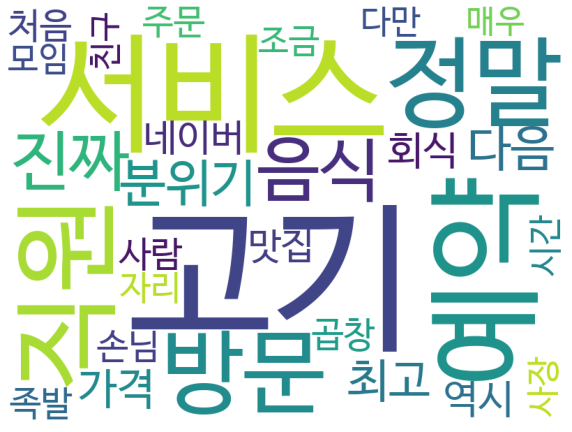

In [26]:
#wordcloud 생성
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white', width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()